# Alora (RSPS) Hosting Blackjack Odds 

### Calculates the odds of winning 'blackjack' as a host 
Blackjack (bj) was a commonly played gambling game in Runescape. The rules are simple. To start a game, a better will trade a host any amount of gold (Ex. 10 million gold pieces). Once the trade has been accepted, the host initiates the game. The host will roll a die using an in-game "dice bag" that can roll 0-100 (integers) i.d.d. The roll is displayed publicly and once the outcome of the roll is known to both players, the better will choose between two options: hit or stay. If the better chooses to stay, the number that was rolled becomes the better's number. If the better chooses to hit, the die will be rolled again and the outcome of the second roll will be added to the first roll. If the sum of the two rolls is greater than 100, the game is over and the host keeps the bet. If the sum of the two rolls is not greater than 100, the better will again choose to hit or stay. If the better chooses to hit, the roll adds to the sum of the second and first roll; hit again, the roll adds to the sum of the third, second, and first roll, etc. If the better's number is not greater than 100 and the better chooses to stay, the host will now continue to roll the die until the sum of his rolls is greater than the better's number or the sum of the host's rolls are greater than 100. If the sum of the host's rolls are greater than the better's number but not greater than 100, the host wins and keeps the bet. If the sum of the host's rolls greater than 100, than the better wins and is given double his bet. 

In [1]:
import numpy as np
import pylab as pyl
%matplotlib inline

In [62]:
testing = False # True will print statements
better_stops = 1

In [63]:
def play_blackjack(testing, better_stops):
    '''
    Plays one round of blackjack Runescape rules 
    
    Output: tuple of (host wins, better wins)
    '''
    host_wins = 0 
    better_wins = 0 

    total_better_roll = 0  
    while total_better_roll < better_stops: 
        next_roll = np.random.randint(1,101)
        if testing == True:
            print("Better rolls", next_roll)
        total_better_roll += next_roll
        if testing == True: 
            print("Current better total", total_better_roll)
        if total_better_roll > 100:
            host_wins += 1
            if testing == True:
                print("Better busts")
            winner = (host_wins, better_wins)
            return winner
            break 
    host_roll = 0
    while host_roll <= total_better_roll:
        next_roll = np.random.randint(1,101)
        if testing == True:
            print("Host rolls", next_roll)
        host_roll += next_roll 
        if testing == True:
            print("Current host total", host_roll)
        if host_roll == 100 and total_better_roll == 100:
            if testing == True:
                print("no one wins")
            winner = (0,0)
            return winner 
            break 
        if host_roll > total_better_roll and host_roll <= 100:
            host_wins +=1 
            if testing == True:
                print("host wins")
            
            winner = (host_wins, better_wins)
            return winner 
            break
        if host_roll > 100:
            if testing == True:
                print("Better wins")
            better_wins += 1
            winner = (host_wins, better_wins)
            return winner
            break 
            
    winner = (host_wins, better_wins)
    return winner 

In [64]:
play_blackjack(testing, better_stops)

(0, 1)

In [65]:
# play the game many times 
host = 0 
better = 0 
playtimes = 50000
better_stop_list = []
better_stop_range = list(range(1, 99))

for j in better_stop_range:
    better_stops = j
    host = 0 
    better = 0 
    for i in range(0, playtimes):
        winner = play_blackjack(testing, better_stops)
        if winner == (1,0):
            host += 1
        if winner == (0,1):
            better +=1
    #print("Host wins ", 100 * host / playtimes, "% of the time")
    #print("Better wins ", 100 * better / playtimes , "% of the time")
    better_win_percentage = 100 * better / playtimes
    print("For a better stop at", better_stops, "the better win % is", better_win_percentage)
    better_stop_list.append(better_win_percentage)
    

#print("Total games played:", host + better)

#print("Better stop list", better_stop_list)
#pyl.plot(better_stop_range, better_stop_list)
#pyl.ylabel("Win percentage")
#pyl.xlabel("Better stop number")
#pyl.title("Better win percentage vs. Better stop number")

For a better stop at 1 the better win % is 29.09
For a better stop at 2 the better win % is 29.224
For a better stop at 3 the better win % is 29.15
For a better stop at 4 the better win % is 29.962
For a better stop at 5 the better win % is 30.304
For a better stop at 6 the better win % is 30.172
For a better stop at 7 the better win % is 30.38
For a better stop at 8 the better win % is 30.902
For a better stop at 9 the better win % is 30.596
For a better stop at 10 the better win % is 31.392
For a better stop at 11 the better win % is 31.606
For a better stop at 12 the better win % is 32.29
For a better stop at 13 the better win % is 32.292
For a better stop at 14 the better win % is 32.498
For a better stop at 15 the better win % is 33.142
For a better stop at 16 the better win % is 33.412
For a better stop at 17 the better win % is 33.698
For a better stop at 18 the better win % is 33.812
For a better stop at 19 the better win % is 34.322
For a better stop at 20 the better win % is 

Max better win percentage is  43.244
For the better to play optimally, they should stop at  61


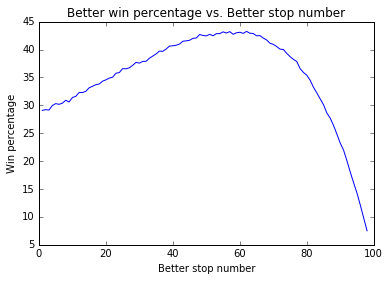

In [74]:
pyl.plot(better_stop_range, better_stop_list)
pyl.ylabel("Win percentage")
pyl.xlabel("Better stop number")
pyl.title("Better win percentage vs. Better stop number")
best_better_win_perc = max(better_stop_list)
print("Max better win percentage is ", best_better_win_perc)
index_of_best_better_win_perc = better_stop_list.index(best_better_win_perc)
print("For the better to play optimally, they should stop at ", index_of_best_better_win_perc)

#print(type(better_stop_range))
#print("Position", better_stop_range)

In [109]:
better_roll = 80 
testing = True

In [95]:
def odds_given_better_roll(testing, better_roll):
    '''
    Plays the host round of blackjack given the better roll 
    
    Output: tuple of (host wins, better wins)
    '''
    host_wins = 0 
    better_wins = 0 

    if testing == True:
        print("Better rolls", better_roll)
    host_roll = 0
    while host_roll <= better_roll:
        next_roll = np.random.randint(1,101)
        if testing == True:
            print("Host rolls", next_roll)
        host_roll += next_roll 
        if testing == True:
            print("Current host total:", host_roll)
        if host_roll == 100 and better_roll == 100:
            if testing == True:
                print("no one wins")
            winner = (0,0)
            return winner 
            break 
        if host_roll > better_roll and host_roll <= 100:
            host_wins +=1 
            if testing == True:
                print("host wins")
            
            winner = (host_wins, better_wins)
            return winner 
            break
        if host_roll > 100:
            if testing == True:
                print("Better wins")
            better_wins += 1
            winner = (host_wins, better_wins)
            return winner
            break 
            
    winner = (host_wins, better_wins)
    return winner 

In [111]:
odds_given_better_roll(testing, better_roll)

Better rolls 80
Host rolls 21
Current host total: 21
Host rolls 19
Current host total: 40
Host rolls 82
Current host total: 122
Better wins


(0, 1)

In [107]:
# play the game many times 
host = 0 
better = 0 
playtimes = 10000
better_roll_list = []
better_roll_range = list(range(1, 100))

for j in better_roll_range:
    better_roll = j
    host = 0 
    better = 0 
    for i in range(0, playtimes):
        winner = odds_given_better_roll(testing, better_roll)
        if winner == (1,0):
            host += 1
        if winner == (0,1):
            better +=1
    #print("Host wins ", 100 * host / playtimes, "% of the time")
    #print("Better wins ", 100 * better / playtimes , "% of the time")
    better_win_percentage = 100 * better / playtimes
    print("If the better rolls a", better_roll, "the chance of the better winning is", better_win_percentage)
    better_roll_list.append(better_win_percentage)
    

#print("Total games played:", host + better)

#print("Better stop list", better_stop_list)
#pyl.plot(better_stop_range, better_stop_list)
#pyl.ylabel("Win percentage")
#pyl.xlabel("Better stop number")
#pyl.title("Better win percentage vs. Better stop number")

If the better rolls a 1 the chance of the better winning is 0.01
If the better rolls a 2 the chance of the better winning is 0.02
If the better rolls a 3 the chance of the better winning is 0.06
If the better rolls a 4 the chance of the better winning is 0.12
If the better rolls a 5 the chance of the better winning is 0.11
If the better rolls a 6 the chance of the better winning is 0.17
If the better rolls a 7 the chance of the better winning is 0.23
If the better rolls a 8 the chance of the better winning is 0.33
If the better rolls a 9 the chance of the better winning is 0.44
If the better rolls a 10 the chance of the better winning is 0.44
If the better rolls a 11 the chance of the better winning is 0.71
If the better rolls a 12 the chance of the better winning is 0.83
If the better rolls a 13 the chance of the better winning is 1.15
If the better rolls a 14 the chance of the better winning is 1.11
If the better rolls a 15 the chance of the better winning is 1.22
If the better rolls

99
99


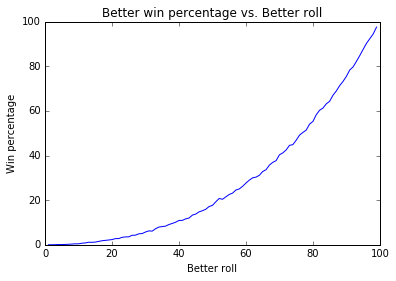

In [108]:
print(len(better_roll_range))
print(len(better_roll_list))
pyl.plot(better_roll_range, better_roll_list)
pyl.ylabel("Win percentage")
pyl.xlabel("Better roll")
pyl.title("Better win percentage vs. Better roll")
#best_better_win_perc = max(better_stop_list)
#print("Max better win percentage is ", best_better_win_perc)
#index_of_best_better_win_perc = better_stop_list.index(best_better_win_perc)
#print("For the better to play optimally, they should stop at ", index_of_best_better_win_perc)

#print(type(better_stop_range))
#print("Position", better_stop_range)